In [24]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
WISE = fits.open("MPL8-all_WISE.fits", memmap=True)
WISE_table = Table(WISE[1].data)
HI_WISE = fits.open("HI_WISE.fits", memmap=True)
HI_WISE_table = Table(HI_WISE[1].data)


In [32]:
W2_matched = numpy.array(HI_WISE_table['W2mag'])  # Stores all data of W2 in WISE galaxies matched in HI
W3_matched = numpy.array(HI_WISE_table['W3mag'])  # Stores all data of W3 in WISE galaxies matched in HI

#---------------------------------------------- For different selectors
# W2_initial = numpy.array(HI_WISE_table['W2mag'])  # Stores all data of W2 in WISE galaxies matched in HI
# W3_initial = numpy.array(HI_WISE_table['W3mag'])  # Stores all data of W3 in WISE galaxies matched in HI

# Flagall_initial = numpy.array(HI_WISE_table['conflag'])   # All Flag data 
# MHI_log_initial = numpy.array(HI_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)

# W2diffW3 = W2_initial - W3_initial 

# lowSFR = numpy.where(W2diffW3 < 2.0)

# MHI_log = MHI_log_initial[lowSFR]                  # HI Mass log(Msun)
# W2 = W2_initial[lowSFR]
# W3 = W3_initial[lowSFR]
# Plateifu = Plateifu_initial[lowSFR]
# Flagall = Flagall_initial[lowSFR]

# print(len(W2_initial))
# print(len(W2))
# print(len(W2[numpy.where((Flagall == 0) & (MHI_log > 0))]))
#-------------------------------------------------



#Diagnosis for number of samples. Not required for histogram
# HI_Pipe3D_WISE = fits.open("HI_Pipe3D_WISE.fits", memmap=True)
# HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)
# Plateifu1 = numpy.array(HI_WISE_table['PLATEIFU'])
# Plateifu2 = numpy.array(HI_Pipe3D_WISE_table['PLATEIFU_2'])
# print(len(Plateifu1), len(Plateifu2))
# not_matched = [x for x in Plateifu2 if x not in Plateifu1]
# print(len(not_matched))

#---------------------------

W2 = numpy.array(WISE_table['W2mag'])  # Stores all data of W2 in WISE
W3 = numpy.array(WISE_table['W3mag'])  # Stores all data of W3 in WISE

W2diffW3 = W2 - W3
W2diffW3_matched = W2_matched - W3_matched

lowSFR_matched = numpy.where(W2diffW3_matched < 2.0)
lowSFR = numpy.where(W2diffW3 < 2.0)


print(len(W2diffW3))
print(len(W2diffW3[lowSFR]))
print(len(W2diffW3_matched))
print(len(W2diffW3_matched[lowSFR_matched]))




2181
552
1380
283


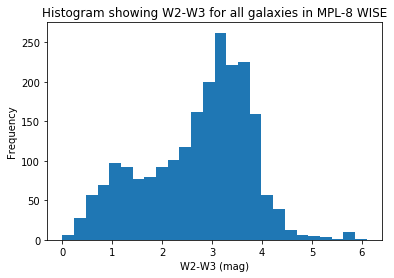

In [33]:
plt.xlabel("W2-W3 (mag)")
plt.ylabel("Frequency")
plt.title("Histogram showing W2-W3 for all galaxies in MPL-8 WISE")
plt.hist(W2diffW3, bins='auto')
plt.show()

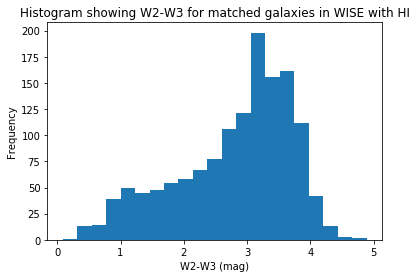

In [34]:
plt.xlabel("W2-W3 (mag)")
plt.ylabel("Frequency")
plt.title("Histogram showing W2-W3 for matched galaxies in WISE with HI")
plt.hist(W2diffW3_matched, bins='auto')
plt.show()